# Instituto Superior de Engenharia de Lisboa

## Licenciatura em Engenharia Informática e Multimédia

# Processamento Digital de Sinais

## Trabalho Prático 1
    
     
    Docente: Isabel Martins
   
    Realizador por:
    43498 Roman Ishchuk
    48965 Pedro Silva
    49247 Cláudia Sequeira
    
   
    08/05/2022

In [101]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio, display
from scipy import signal
from ipywidgets import interact
from ipyleaflet import GeoJSON, Map, Polyline
from vincenty import vincenty
import json
import os
import requests

ModuleNotFoundError: No module named 'vincenty'

# Exercicio I
## Geração de Sinais
1. Use a função plot para representar os seguintes sinais contínuos (use a base de tempo que achar adequada) :

    a) a(t) = 2 cos(2π19t) + 5 sin(2π20t)

    b) b(t) =1 + $\frac{1}{2}$cos(2π12t)cos(2π200t)
    
    c) c(t)= $e^{-20t^2}\cos(2\pi 100 t)(u(t+3)-u(t-3))$

    d) d(t) = $\frac{4}{π}$ $Σ^{N}_{k=1}$ $\frac{sin(2π(2k−1) f{_0} t)}{2k−1}$, onde f0 = 5Hz. Valide o resultado separadamente com N ∈ {1, 10, 1000}

    e) e(t) = $\frac{8}{π^{2}}$ $Σ^{N}_{k=1}$ $\frac{sin(2π(2k−1) f{_0} t)}{(2k−1)^{2}}$, onde f0 = 1Hz. Valide o resultado separadamente com N∈{1, 10, 1000}


2. Analise os sinais no domÍnio da frequência, representando os espectro de amplitude usando a fft.


3. Represente os espectrogramas de modo a analisar simultaneamente o domínio tempo e frequência

### Plot Sinal — a(t)

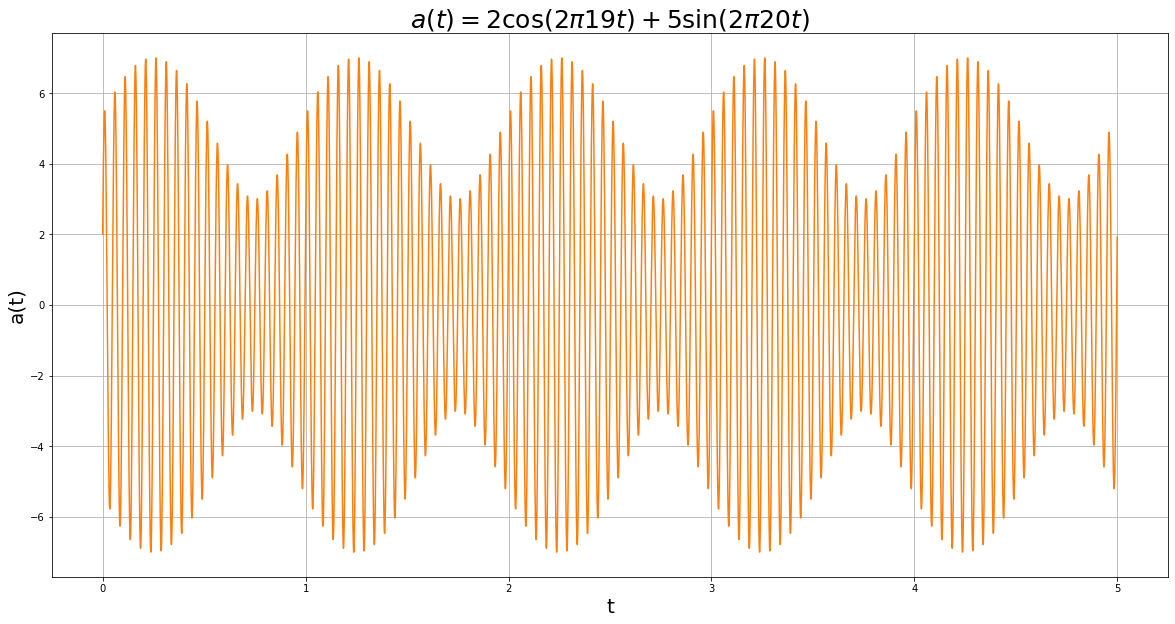

In [27]:
Fs= 8000
Ts= 1/Fs
f1=19
f2=20
f0= np.gcd(f1,f2)
T0 = 1/f0
t = np.arange(0,5*T0,Ts) #representacao do sinusoide com 5 periodos

a = 2*np.cos(2*np.pi*f1*t) + 5*np.sin(2*np.pi*f2*t)

plt.figure(facecolor='w', figsize=(20,10))
plt.plot(t,a,'C1')
plt.ylabel('a(t)', fontsize=20)
plt.xlabel('t', fontsize=20)
plt.title('$a(t)= 2\cos(2\\pi 19 t) + 5\sin(2\\pi 20 t)$',fontsize=25)
plt.grid(True)

### Espectro de Amplitude do Sinal — a(t)

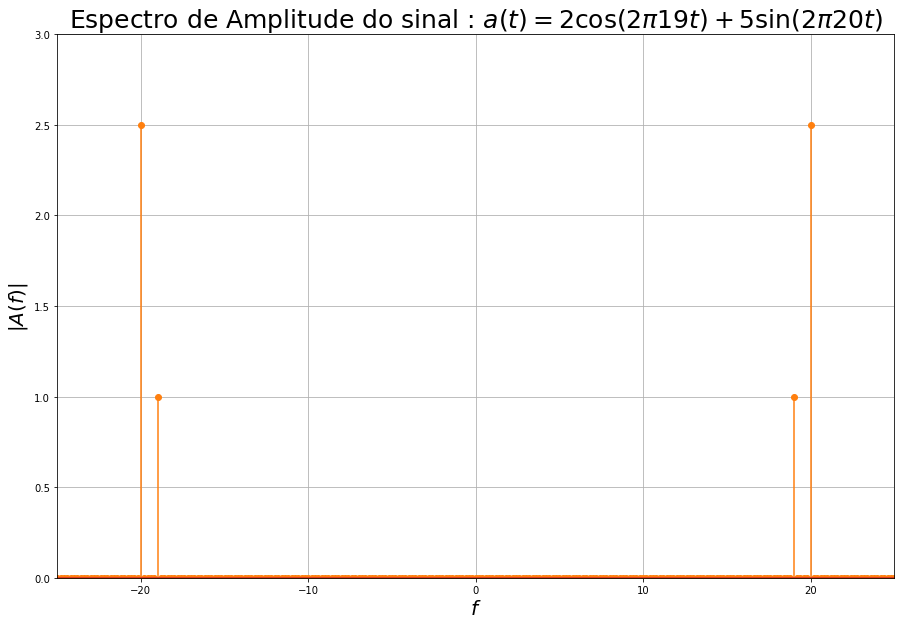

In [28]:
A = np.fft.fft(a)/len(a)#calcular fft (normalizada)
Afreq = np.fft.fftfreq(len(a), Ts) #determinacao das freq
Aampl = np.abs(A) #espetro de amplitude

plt.figure(facecolor='w', figsize=(15,10))
plt.stem(Afreq, Aampl, 'C1', markerfmt='C1o', use_line_collection= True)
plt.axis([-25, 25, 0, 3])
plt.ylabel('$|A(f)|$', fontsize=20)
plt.xlabel('$f$', fontsize=20)
plt.title('Espectro de Amplitude do sinal : $a(t)= 2\cos(2\\pi 19 t) + 5\sin(2\\pi 20 t)$',fontsize=25)
plt.grid(True)

### Espectrograma do Sinal — a(t)

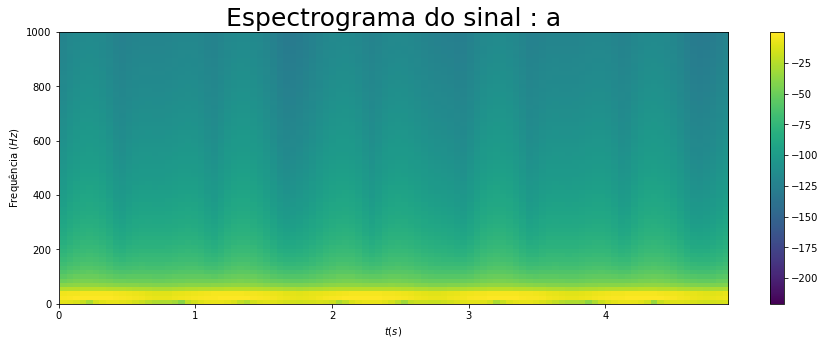

In [29]:
plt.figure(figsize=(15,5))

plt.specgram(a,NFFT=512, Fs=Fs)
plt.colorbar()
plt.ylabel('Frequência $(Hz)$', fontsize=10)
plt.xlabel('$t(s)$', fontsize=10)
plt.title('Espectrograma do sinal : a',fontsize=25)
plt.axis([0, 4.9, 0, 1000])
print()

### Plot Sinal — b(t)

4


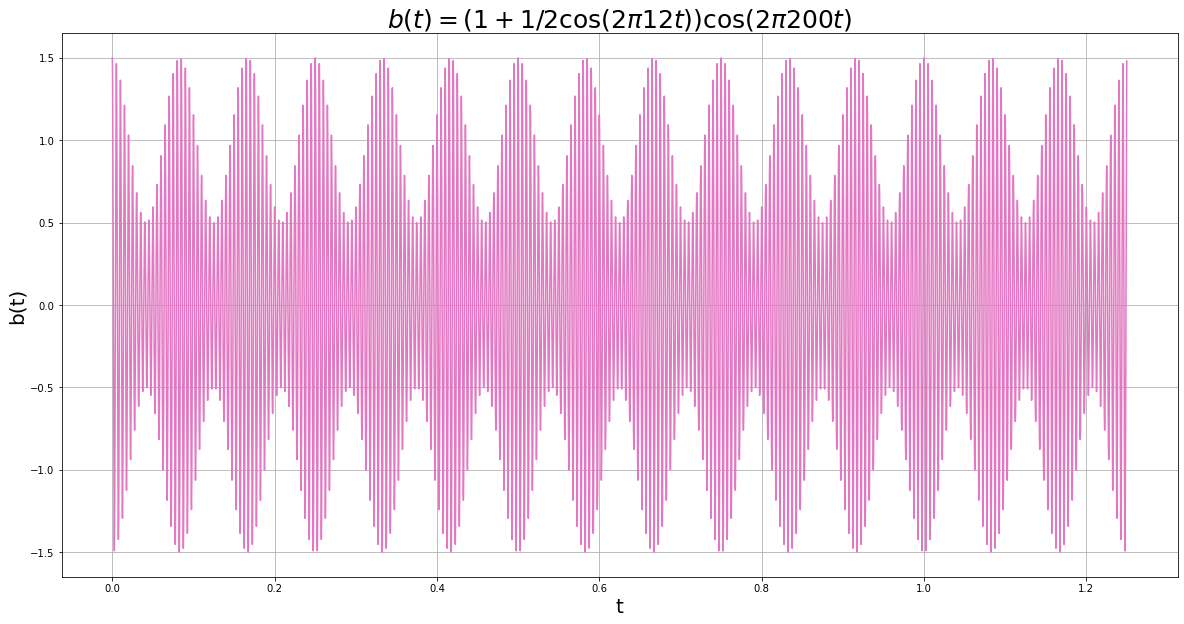

In [100]:
Fs= 8000
Ts= 1/Fs
f1=12
f2=200
f0= np.gcd(f1,f2)
print(f0)
T0 = 1/f0
t = np.arange(0,5*T0,Ts)


b = (1+0.5*np.cos(2*np.pi*f1*t))*np.cos(2*np.pi*f2*t)

plt.figure(facecolor='w', figsize=(20,10))
plt.plot(t,b,'C6')
plt.ylabel('b(t)', fontsize=20)
plt.xlabel('t', fontsize=20)
plt.title('$b(t)= (1+1/2\cos(2\\pi 12 t))\cos(2\\pi 200 t)$',fontsize=25)
plt.grid(True)

### Espectro de Amplitude do Sinal — b(t)

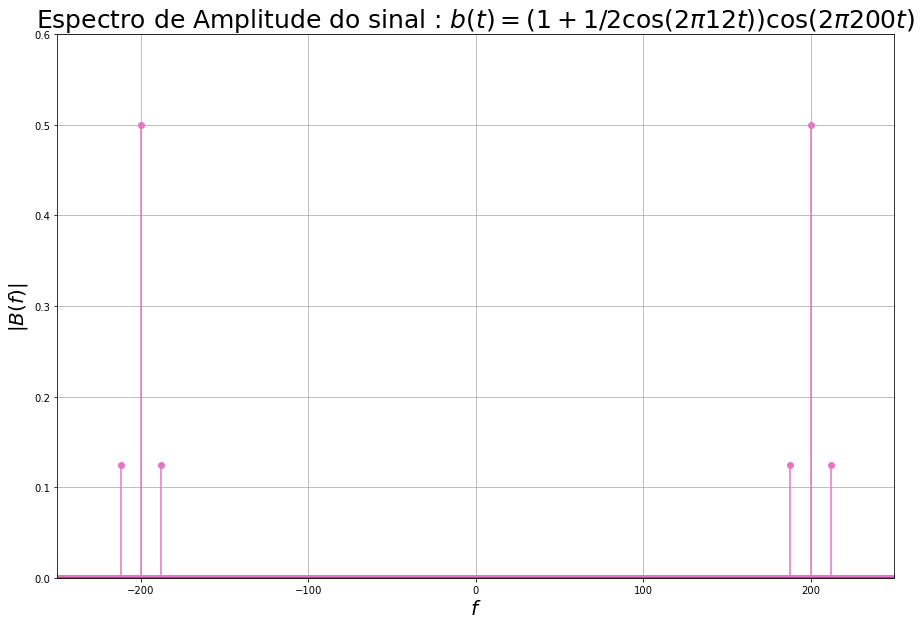

In [31]:
B = np.fft.fft(b)/len(b)
Bfreq = np.fft.fftfreq(len(b), Ts)#determinacao das freq
Bampl = np.abs(B)#espetro de amplitude 

plt.figure(facecolor='w', figsize=(15,10))
plt.stem(Bfreq, Bampl, 'C6', markerfmt='C6o', use_line_collection= True)
plt.axis([-250, 250, 0, 0.6])
plt.ylabel('$|B(f)|$', fontsize=20)
plt.xlabel('$f$', fontsize=20)
plt.title('Espectro de Amplitude do sinal : $b(t)= (1+1/2\cos(2\\pi 12 t))\cos(2\\pi 200 t)$',fontsize=25)
plt.grid(True)

### Espectrograma do Sinal — b(t)

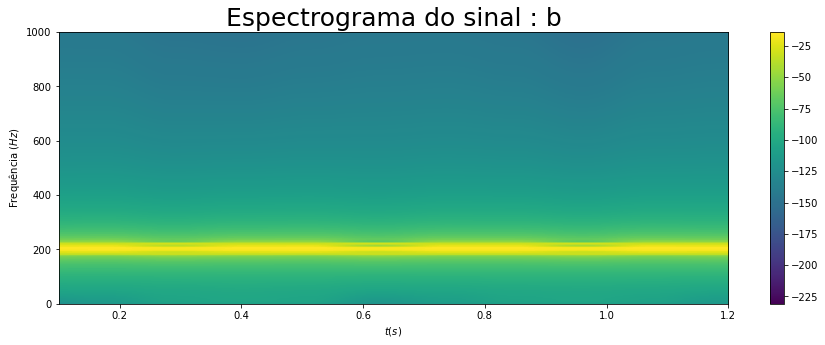

In [32]:
plt.figure(figsize=(15,5))

plt.specgram(b,NFFT=1024, Fs=Fs)
plt.colorbar()
plt.ylabel('Frequência $(Hz)$', fontsize=10)
plt.xlabel('$t(s)$', fontsize=10)
plt.title('Espectrograma do sinal : b(t)',fontsize=25)
plt.axis([0.1, 1.2, 0, 1000])
print()

### Plot Sinal — c(t)

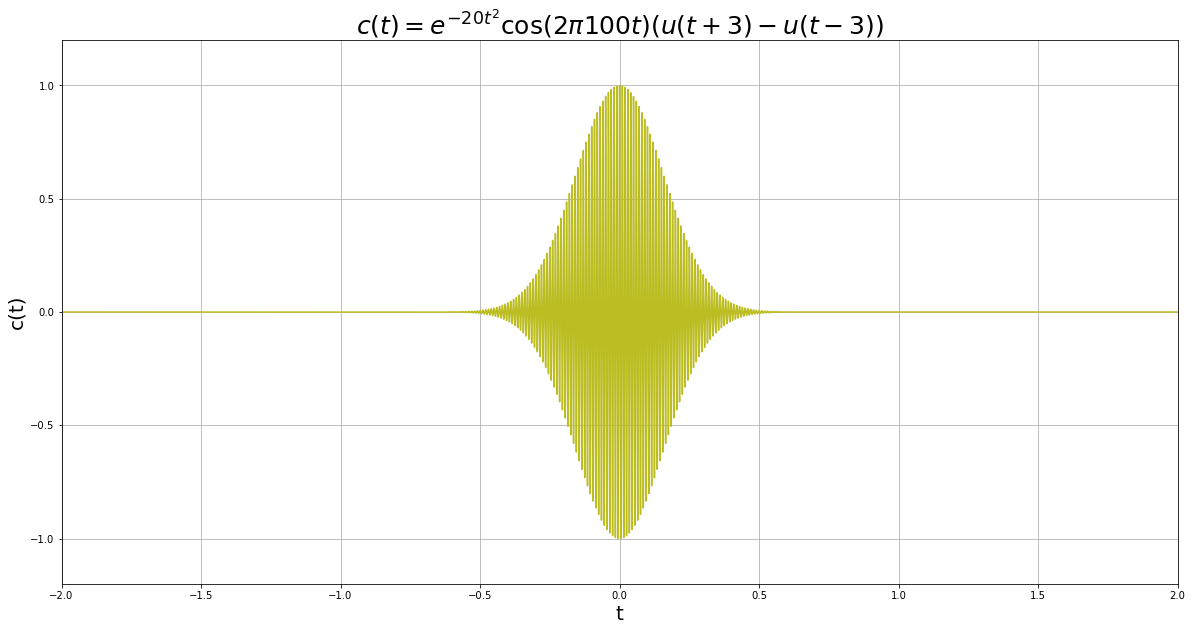

In [33]:
Fs= 8000
Ts= 1/Fs
tt=[-3.5,3.5]
t = np.arange(tt[0],tt[1],Ts)

# criar arrays a zeros com o numero de elementos de t
u1=np.zeros(t.shape)
u2=np.zeros(t.shape)

# igualar a 1 entre-3 e 3
u1[(t+3)>= 0]=1
u2[(t-3) > 0]=1

u= u1-u2

c= np.exp(-20*t**2)*np.cos(2*np.pi*100*t)*u

plt.figure(facecolor='w', figsize=(20,10))
plt.plot(t,c,'C8')
plt.axis([-2, 2, -1.2, 1.2])
plt.ylabel('c(t)', fontsize=20)
plt.xlabel('t', fontsize=20)
plt.title('$c(t)= e^{-20t^2}\cos(2\pi 100 t)(u(t+3)-u(t-3))$',fontsize=25)
plt.grid(True)

### Espectro de Amplitude do Sinal — c(t)

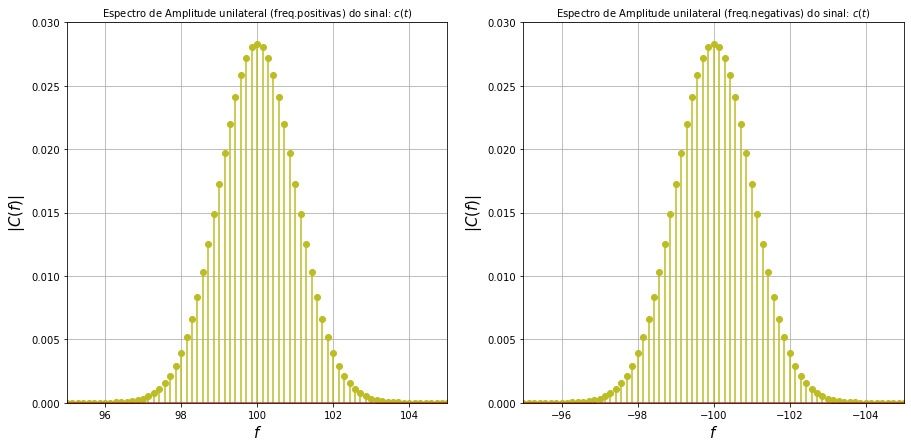

In [64]:
C = np.fft.fft(c)/len(c)
freq = np.fft.fftfreq(len(c), Ts)

#positivas
freq_metade1 = freq[:int(len(c)/2)] #determinacao das freq
Campl_metade1 = np.abs(C[:int(len(c)/2)]) #espetro de amplitude

#negativas
freq_metade2 = freq[(int(len(c)/2)):] #determinacao das freq
Campl_metade2 = np.abs(C[int(len(c)/2):]) #espetro de amplitude 

plt.figure(facecolor='w', figsize=(15,7))
plt.subplot(1, 2, 1)
plt.stem(freq_metade1, Campl_metade1, 'C8', 'C8o', use_line_collection= True)
plt.axis([95, 105, 0, 0.03])
plt.grid(True)
plt.ylabel('$|C(f)|$', fontsize=15)
plt.xlabel('$f$', fontsize=15)
plt.title('Espectro de Amplitude unilateral (freq.positivas) do sinal: $c(t)$',fontsize=10)


plt.subplot(1, 2, 2)
plt.stem(freq_metade2, Campl_metade2, 'C8', 'C8o', use_line_collection= True)
plt.axis([-95, -105, 0, 0.03])
plt.ylabel('$|C(f)|$', fontsize=15)
plt.xlabel('$f$', fontsize=15)
plt.title('Espectro de Amplitude unilateral (freq.negativas) do sinal: $c(t)$',fontsize=10)
plt.grid(True)

### Espectrograma do Sinal — c(t)

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7553: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


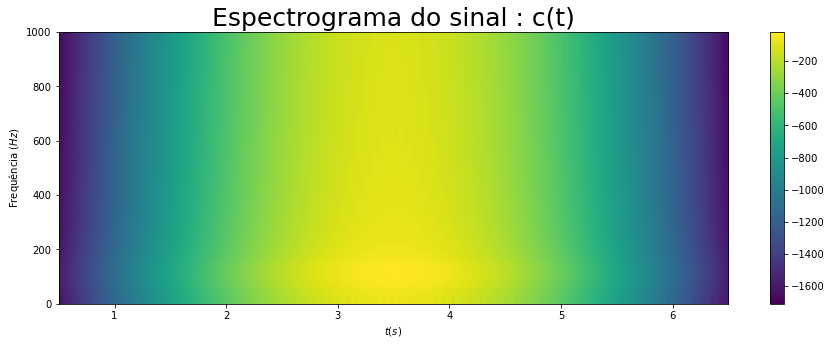

In [34]:
plt.figure(figsize=(15,5))

plt.specgram(c, Fs=Fs)
plt.colorbar()
plt.ylabel('Frequência $(Hz)$', fontsize=10)
plt.xlabel('$t(s)$', fontsize=10)
plt.title('Espectrograma do sinal : c(t)',fontsize=25)
plt.axis([0.5, 6.5, 0, 1000])
print()

### Plot Sinal — d(t)

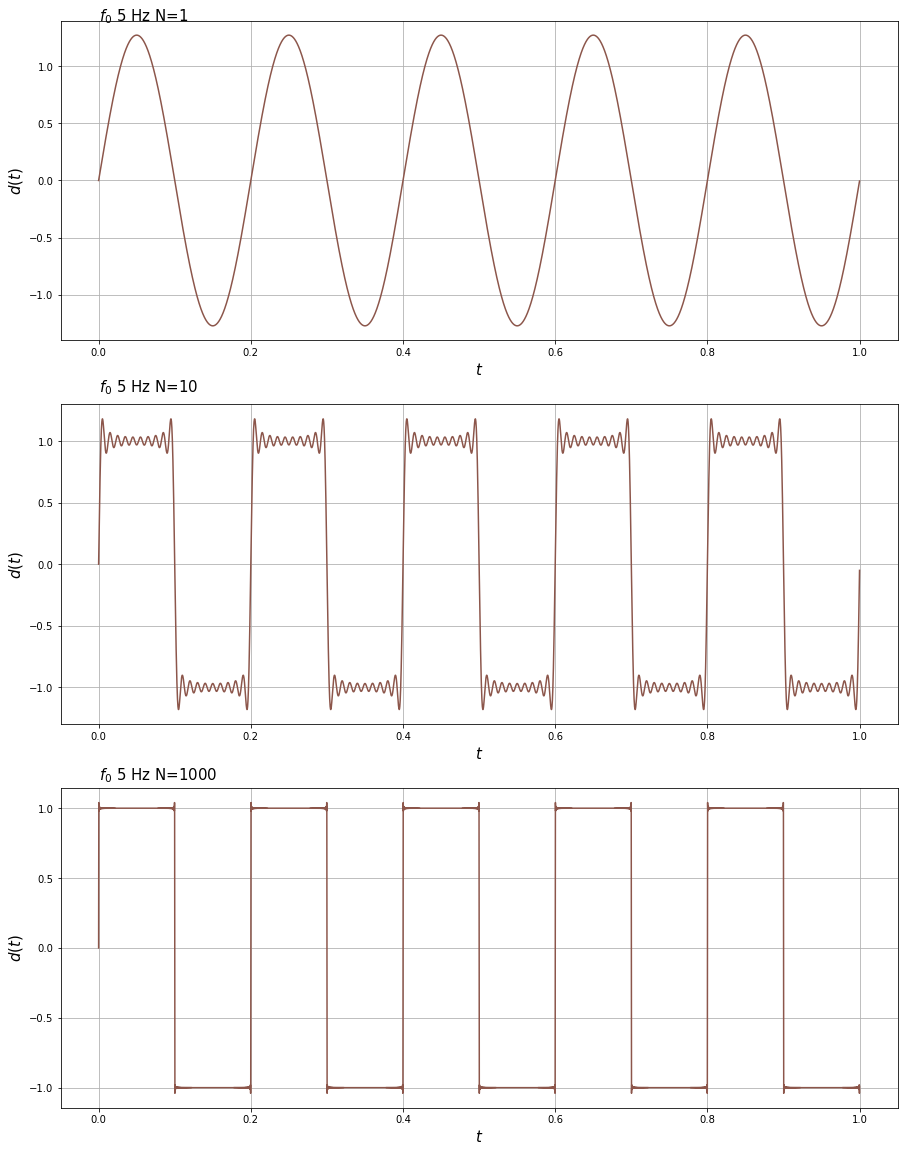

In [68]:
#funcao para o calculo da onda quadrada
def soma_quadrada(f0, t, N):
    x = np.zeros(t.shape)
    for k in np.arange(1, N+1):
        x = x + np.sin(2*np.pi*(2*k-1)*f0*t)/(2*k-1)
    x = x*(4/np.pi)
    return x

Ns = [1, 10, 1000]
Fs = 8000
Ts = 1/Fs
f0 = 5
T0 = 1/f0

t= np.arange(0, T0*5, Ts)

plt.figure(facecolor='w', figsize=(15,20))

m = 1 # variavel auxiliar -plot

#somatorio da onda quadrada
for N in Ns:
    d = soma_quadrada(f0, t, N)
    plt.subplot(310+m)
    plt.plot(t, d, 'C5', linewidth=1.5)
    String = '$f_0$ 5 Hz N=' + str(N)
    if(m==3):
        plt.text(0, 1.2, String, fontsize=15)
    else:
        plt.text(0, 1.4, String, fontsize=15)
    plt.ylabel('$d(t)$', fontsize=15)
    plt.xlabel('$t$', fontsize=15)
    plt.grid(True)
    m+=1

### Espectro de Amplitude do Sinal — d(t)

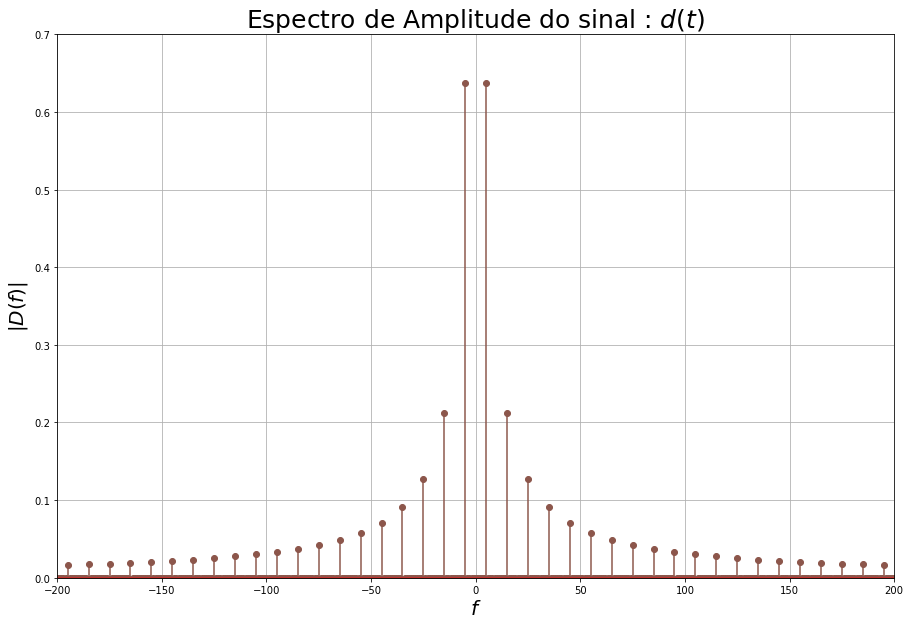

In [69]:
D = np.fft.fft(d)/len(d)
Dfreq = np.fft.fftfreq(len(d))*Fs
Dampl = np.abs(D)

### Espectro de Amplitude do Sinal — c(t)

plt.figure(facecolor='w', figsize=(15,10))
plt.stem(Dfreq, Dampl, 'C5', markerfmt='C5o', use_line_collection= True)
plt.axis([-200, 200, 0, 0.7])
plt.ylabel('$|D(f)|$', fontsize=20)
plt.xlabel('$f$', fontsize=20)
plt.title('Espectro de Amplitude do sinal : $d(t)$',fontsize=25)
plt.grid(True)

### Espectograma do Sinal — d(t)

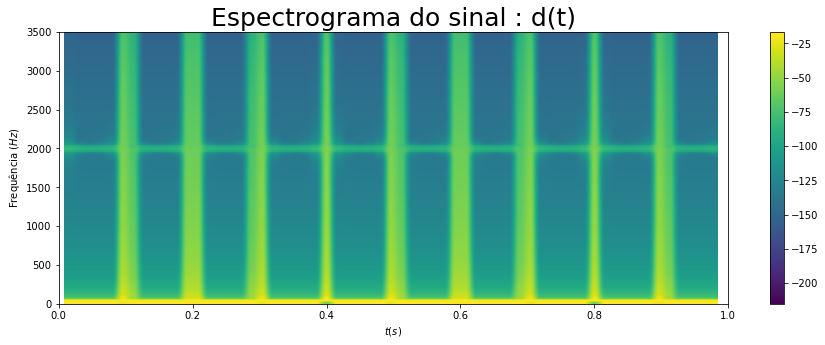

In [73]:
plt.figure(figsize=(15,5))

plt.specgram(d, NFFT=256, Fs=Fs)
plt.colorbar()
plt.ylabel('Frequência $(Hz)$', fontsize=10)
plt.xlabel('$t(s)$', fontsize=10)
plt.title('Espectrograma do sinal : d(t)',fontsize=25)
plt.axis([0, 1, 0, 3500])
print()

### Plot Sinal — e(t)

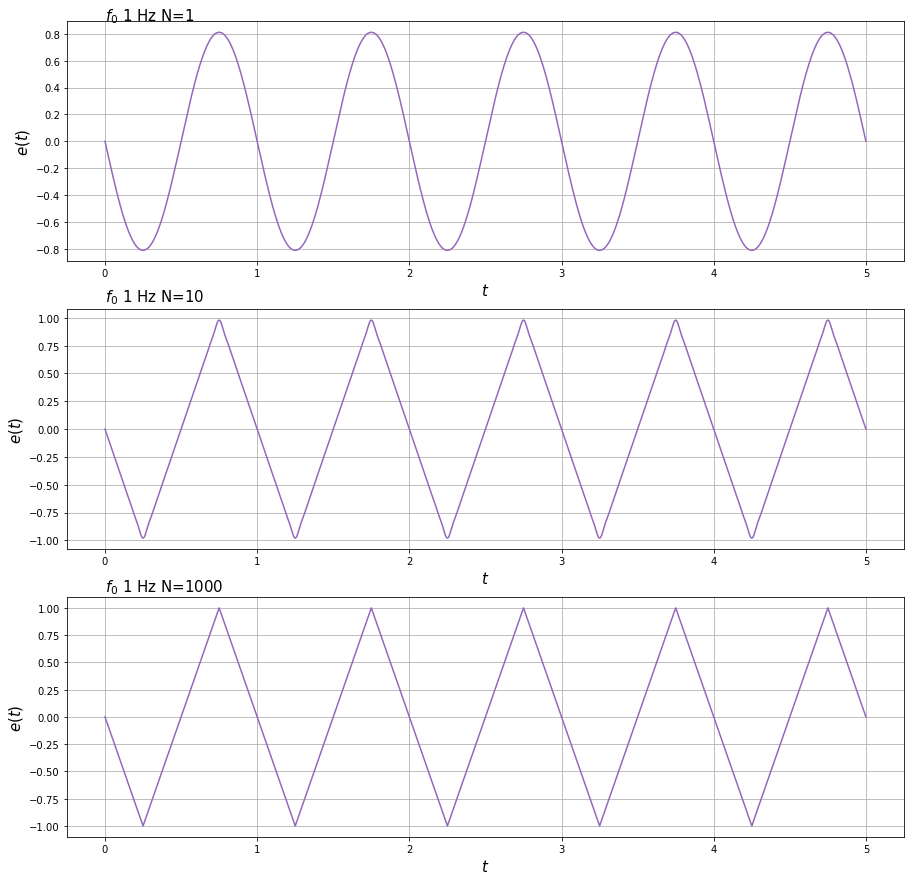

In [76]:
def soma_quadrada(f0, t, N):
    x = np.zeros(t.shape)
    for k in np.arange(1, N+1):
        x = x + ((-1)**k) * (np.sin(2*np.pi*(2*k-1)*f0*t)/(2*k-1)**2)
    x = x*(8/(np.pi**2))
    return x

Ns = [1, 10, 1000]
Fs = 8000
Ts = 1/Fs
f0 = 1
T0 = 1/f0

t= np.arange(0, T0*5, Ts) 

plt.figure(facecolor='w', figsize=(15,15))

m = 1

for N in Ns:
    e = soma_quadrada(f0, t, N)
    plt.subplot(310+m)
    plt.plot(t, e, 'C4', linewidth=1.5)
    String = '$f_0$ 1 Hz N=' + str(N)
    if(m!=1):
        plt.text(0, 1.15, String, fontsize=15)
    else:
        plt.text(0, 0.9, String, fontsize=15)
    plt.ylabel('$e(t)$', fontsize=15)
    plt.xlabel('$t$', fontsize=15)
    plt.grid(True)
    m+=1

### Espectro de Amplitude do sinal — e(t)

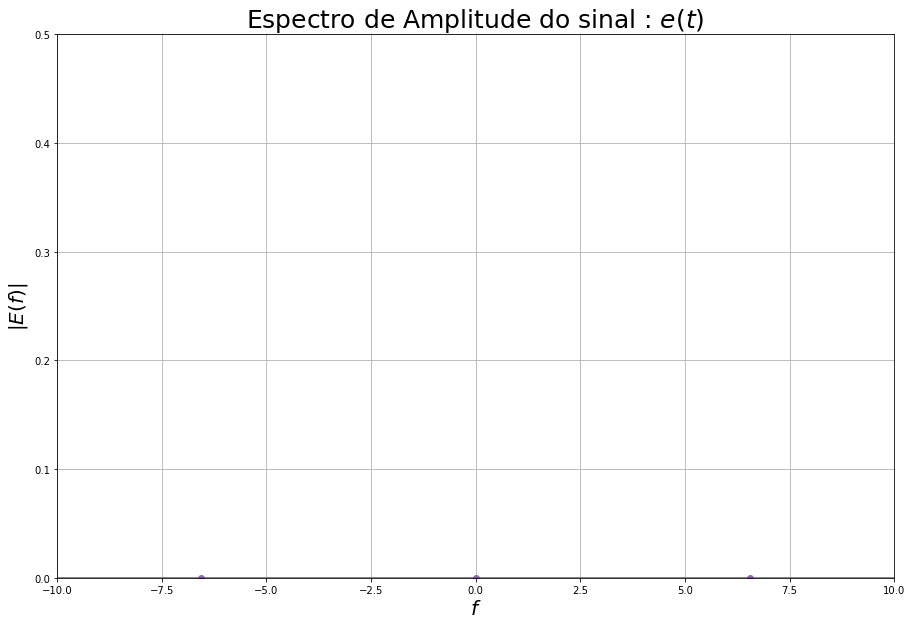

In [98]:
E = np.fft.fft(e)/len(e)
Efreq = np.fft.fftfreq(len(e))*Fs
Eampl = np.abs(E)

plt.figure(facecolor='w', figsize=(15,10))
plt.stem(Efreq, Eampl, 'C4', markerfmt='C4o', use_line_collection= True)
plt.axis([-10, 10, 0, 0.5])
plt.ylabel('$|E(f)|$', fontsize=20)
plt.xlabel('$f$', fontsize=20)
plt.title('Espectro de Amplitude do sinal : $e(t)$',fontsize=25)
plt.grid(True)

### Espectograma do Sinal — e(t)

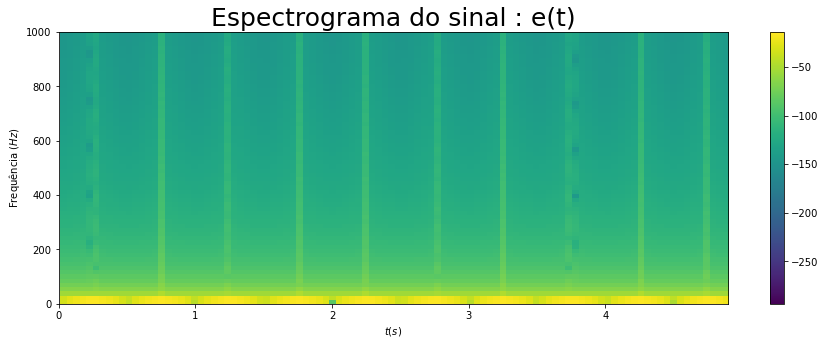

In [83]:
plt.figure(figsize=(15,5))

plt.specgram(e,NFFT=512, Fs=Fs)
plt.colorbar()
plt.ylabel('Frequência $(Hz)$', fontsize=10)
plt.xlabel('$t(s)$', fontsize=10)
plt.title('Espectrograma do sinal : e(t)',fontsize=25)
plt.axis([0, 4.9, 0, 1000])
print()

# Exercicio II
## Sintese de notas musicais
4. Desenvolva uma funcção que crie composições musicais baseadas em sinusóides. A função tem como argumentos de entrada uma lista de tuplos representantes das notas e suas durações no formato (nota, número de unidades de tempo) e a unidade de tempo (em bpm). A nota deve ser expressa usando a notação ABC, exemplo: ( (’c’, 4), (’e’, 4), (’g’, 4), (’c5’, 1) ) ). A função deve retornar um array com as amplitudes instantaneas correspondentes à composição musical. Deve exemplificar o funcionamento da função com uma composição onde varie a frequência e a duração das notas. Visualize o sinal no domínio do tempo e na frequência (espectro e espectrograma). Oiça o sinal criado e altere os bpms para verificar as diferenças. 

 # Composição Musical
 
Quanto à composição musical escolhemos a musica Für Elise por Ludwig van Beethoven. Após a escolha da musica consultamos na internet a informação que precisavamos como os bpms da música e as suas notas no piano. Em seguida: 
* Definimos o tempo de compasso com 2 segundos e os bpms da musica original, que são 136.
* Passámos à criação de uma biblioteca com as notas que vamos precisar para a escrever a pauta. As notas são compostas pelo número da tecla e a nome da nota com a notação ABC.
* A pauta inclui o nome da nota e a sua duração. Inclui também as pausas que existem na melodia.
 
Quanto à função que vai criar a nossa composição musical:
* Tem os argumentos pauta e os bpm. Ao aumentar os bpm (beats per minute) obtemos uma musica com um  mais curta, pois tal como o nome indica agora temos mais batimentos por minuto. 136 bpm = $\frac{136}{60}$ = 2,27 Hz.
* Inicia um array que vai conter a nossa composicao musical, por cada nota da pauta é gerado um sinal sinusóidal consoante a sua frequência e duração. Neste caso a frequência é calculada apartir do numero da tecla. 

Após obtermos a composição musical utilizamos o módulo IPython.display para apresentar o excerto da musica. 

In [84]:
tempoCompasso = 2
bpmOriginal = 138
fs = 22050
ts = 1/fs

# Notas e as suas teclas
notas = {'' :  0, 'C4' : 40,'D4' : 42 ,'E4' : 44, 'F4' : 45, 'G4' : 47, 'G#' : 48,
                  'A4' : 49, 'B4' : 51, 'C5': 52, 'D5' : 54, 'D#' : 55, 'E5' : 56} 

pauta = [('E5', 8), ('D#', 8), ('E5', 8), ('D#', 8), ('E5', 8), ('B4', 8), ('D5', 8), 
         ('C5', 8), ('A4', 4), (''  , 4), ('C4', 8), ('E4', 8), ('A4', 8), ('B4', 4), 
         (''  , 4), ('E4', 8), ('G#', 8), ('B4', 8), ('C5', 4)]

def composicao_musical(pauta, bpm):
    composicao = np.array([])
    # tempo de cada compasso para a nossa musica é de 2s a 120bpm. dependendi
    # é gerado um compasso de maior tempo.
    novoTempoCompasso=((tempoCompasso*bpmOriginal)/bpm)
    for i in range(len(pauta)):
        nota = pauta[i][0]    # obtemos a nota
        duracao = pauta[i][1] # obtemos a sua duracao
        tecla = notas[nota]   # obtemos a tecla correspondente à nota
        freq_nota = 2 ** ((tecla-49)/12) * 440 # obtemos a frequencia da nota
        # definimos um array com os t's para cada nota
        t = np.arange(0, (1/duracao) * novoTempoCompasso, ts)
        # criamos o sinal da nota
        x = np.cos(2*np.pi*freq_nota*t)
        # concatenacao das ondas das notas
        composicao = np.hstack((composicao,x))
    return composicao

# criação da musica com os bpm originais
musica = composicao_musical(pauta, bpmOriginal)
print('Composição musical com bpm originais')
display(Audio(data=musica, rate=fs))

# criação da musica com os bpm mais alto
musicaMaisBPM = composicao_musical(pauta, 200)
print('Composição musical mais bpm (200bpm)')
display(Audio(data=musicaMaisBPM, rate=fs))


Composição musical com bpm originais


Composição musical mais bpm (200bpm)


# Visualização no Domínio do Tempo

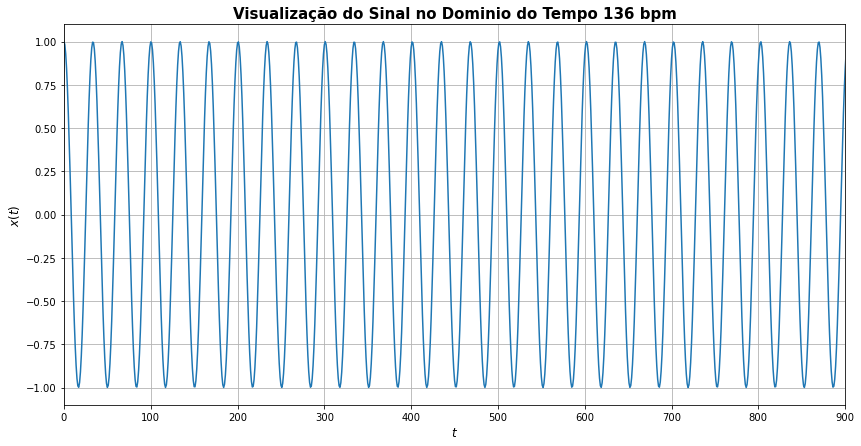

In [85]:
musica = composicao_musical(pauta, bpmOriginal)
plt.figure(figsize=(14,7))
plt.plot(musica)
plt.axis([0 , 900,-1.1, 1.1])
plt.title('Visualização do Sinal no Dominio do Tempo 136 bpm', fontsize=15, weight='bold')
plt.ylabel('$x(t)$', fontsize=12)
plt.xlabel('$t$'  , fontsize=12)
plt.grid()

# Espectro de Amplitude

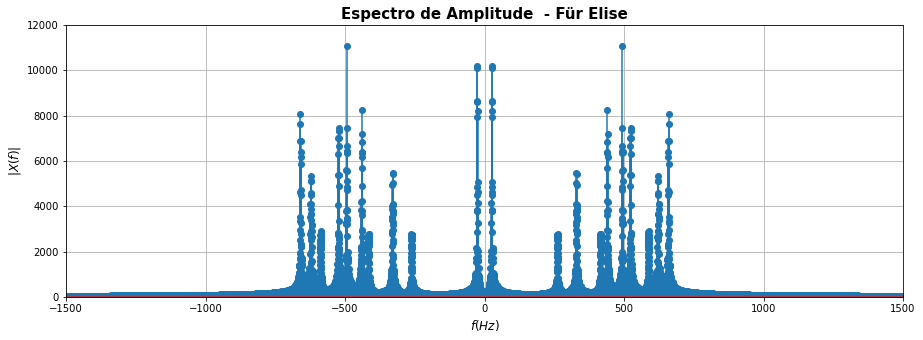

In [86]:
# calculamos a fft normalizada
A = np.fft.fft(musica)
# obtemos as frequencias
frequencia = np.fft.fftfreq(len(musica), ts)
# obtemos o espectro de amplitude
amplitude = np.abs(A)

# plot do Espectro de Amplitude
plt.figure(facecolor='w', figsize=(15,5))
plt.stem(frequencia, amplitude)
plt.axis([-1500, 1500, 0, 12000])
plt.title('Espectro de Amplitude  - Für Elise', fontsize=15, weight='bold')
plt.ylabel('$|X(f)|$', fontsize=12)
plt.xlabel('$f(Hz)$'  , fontsize=12)
plt.grid()

## Espectro de Fase - Für Elise

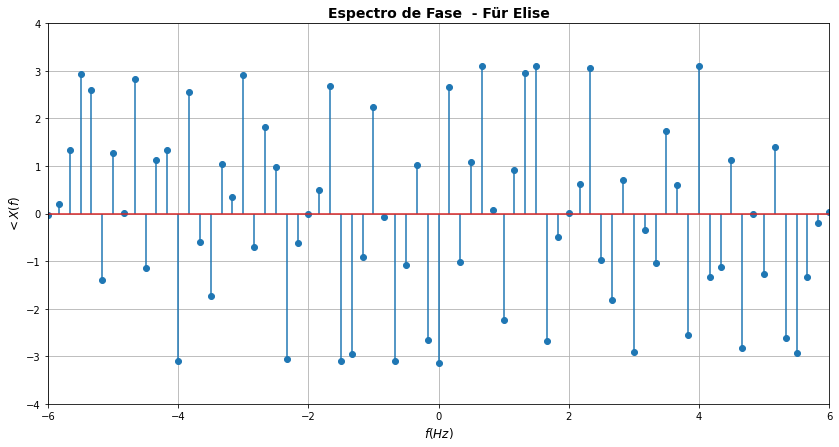

In [87]:
# Espectro de Fase - Für Elise
A = np.fft.fft(musica)/len(musica)
frequencia = np.fft.fftfreq(len(musica))*fs
angle = np.angle(A)

# plot do Espectro de Fase
plt.figure(facecolor='w', figsize=(14,7))
plt.stem(frequencia, angle)
plt.axis([-6, 6, -4, 4])
plt.title('Espectro de Fase  - Für Elise', fontsize=14, weight='bold')
plt.ylabel('$<X(f)$', fontsize=12)
plt.xlabel('$f(Hz)$'  , fontsize=12)
plt.grid()

## Espectrograma - Für Elise
Foram criados dois espectrogramas, um com o número de FFT = 1024, que resultou numa melhor definição em termos da frequência e outro com número de FFT = 512, por sua vez resultou numa melhor definição do tempo.

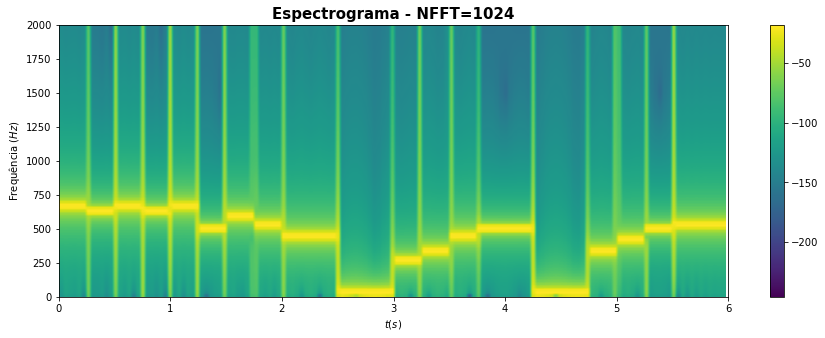

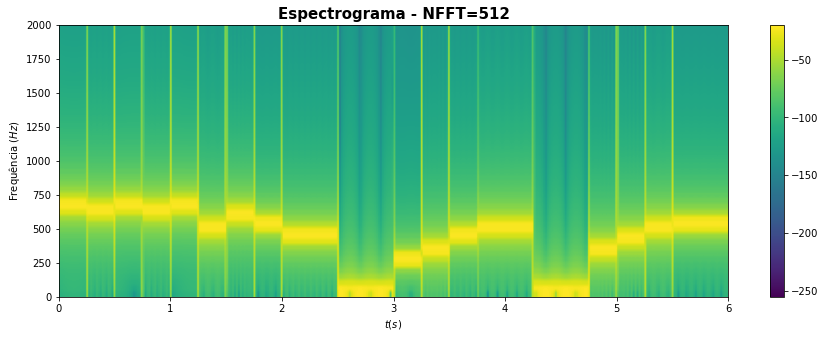

In [88]:
plt.figure(facecolor='w', figsize=(15,5))
plt.specgram(musica, NFFT=1024, Fs=fs)
plt.axis([0, 6, 0, 2000])
plt.colorbar()
plt.ylabel('Frequência $(Hz)$', fontsize=10)
plt.xlabel('$t(s)$', fontsize=10)
plt.title('Espectrograma - NFFT=1024', fontsize=15, weight='bold')

plt.figure(facecolor='w', figsize=(15,5))
plt.specgram(musica, NFFT=512, Fs=fs)
plt.axis([0, 6, 0, 2000])
plt.colorbar()
plt.ylabel('Frequência $(Hz)$', fontsize=10)
plt.xlabel('$t(s)$', fontsize=10)
plt.title('Espectrograma - NFFT=512', fontsize=15, weight='bold')
print()

## Envelope ADSR
5. Crie uma nova versão da funcção onde seja implementada o modelo ADSR de modo a que as notas criadas sejam menos artificiais. Deverá ser possível parametrizar o tempo de Attack/Decay/Sustain/Release em percentagem do tempo da nota/ou em alternativa com valores constantes. Analise as diferenças comparando com a versão original.


In [89]:
def ADSR(nota, A=.25, D=.25, S=.4, R=.10):
    duracao_A = int(len(nota) * A)
    duracao_D = int(len(nota) * D)
    duracao_S = int(len(nota) * S)
    duracao_R = len(nota)-duracao_A-duracao_D-duracao_S
    # definir os valores do ADSR
    A = np.linspace(0, 1,duracao_A)
    D = np.linspace(1, 0.3,duracao_D)
    S = np.ones(duracao_S)*0.3
    R = np.linspace(0.3, 0,duracao_R)
    #contactenar as funcoes
    result = np.hstack((A,D,S,R))
    return result

### Representação Gráfica do Envelope ADSR

Text(490, 0.12, 'Release $\\rightarrow$')

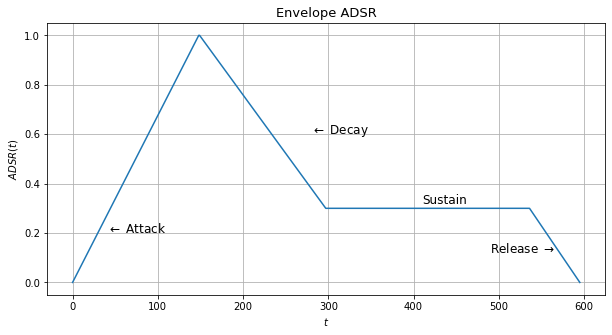

In [90]:
Fs = 2**18 
Ts = 1/Fs
f0 = 440
t0 = 1/f0
t  = np.arange(0, 1/f0, Ts)
nota = np.cos(2*np.pi*f0*t)

plt.figure(figsize=(10,5))
plt.plot(ADSR(nota))
plt.grid()
plt.title('Envelope ADSR', fontsize=13)
plt.ylabel('$ADSR(t)$', fontsize=10)
plt.xlabel('$t$'  , fontsize=10)


plt.text(40,0.2,'$\leftarrow$ Attack' , fontsize = 12)
plt.text(280,0.6,'$\leftarrow$ Decay', fontsize = 12)
plt.text(410, 0.32,'Sustain', fontsize = 12)
plt.text(490,0.12, r'Release $\rightarrow$', fontsize = 12)
print()

### Composição Musical — Aplicação do Envelope ADSR

Ao aplicarmos o envelope ADSR a cada nota obtemos um som mais agradável. A sigla ADRS significa Atack, Decay, Sustain, Realease e ao definirmos tempos para cada um desses 4 passos estamos a criar um som mais "natural" e similar ao de um piano, onde é possivel controlar eses fatores apartir da maneira como preciona as teclas/pedais. 

In [ ]:
tempoCompasso = 2 
bpmOriginal = 136
fs = 22050
ts = 1/fs

# Notas e as suas teclas
notas = {'' :  0, 'C4' : 40,'D4' : 42 ,'E4' : 44, 'F4' : 45, 'G4' : 47, 'G#' : 48,
                  'A4' : 49, 'B4' : 51, 'C5': 52, 'D5' : 54, 'D#' : 55, 'E5' : 56} 

pauta = [('E5', 8), ('D#', 8), ('E5', 8), ('D#', 8), ('E5', 8), ('B4', 8), ('D5', 8), 
         ('C5', 8), ('A4', 4), (''  , 4), ('C4', 8), ('E4', 8), ('A4', 8), ('B4', 4), 
         (''  , 4), ('E4', 8), ('G#', 8), ('B4', 8), ('C5', 4)]

def composicao_musical(pauta, bpm):
    composicao = np.array([])
    # tempo de cada compasso para a nossa musica é de 2s a 120bpm. dependendi
    # é gerado um compasso de maior tempo.
    novoTempoCompasso=((tempoCompasso*bpmOriginal)/bpm)
    for i in range(len(pauta)):
        nota = pauta[i][0]    # obtemos a nota
        duracao = pauta[i][1] # obtemos a sua duracao
        tecla = notas[nota]   # obtemos a tecla correspondente à nota
        freq_nota = 2 ** ((tecla-49)/12) * 440 # obtemos a frequencia da nota
        # definimos um array com os t's para cada nota
        t = np.arange(0, (1/duracao) * novoTempoCompasso, ts)
        # criamos o sinal da nota
        x = np.cos(2*np.pi*freq_nota*t)
        envelope_nota = ADSR(x) * x # aplicamos o envelope ADSR
        # concatenacao das ondas das notas
        composicao = np.hstack((composicao,envelope_nota))
    return composicao

musica = composicao_musical(pauta, bpmOriginal)
display(Audio(data=musica, rate=fs))


### Composição Musical - Outras Ondas 
6. Crie uma nova versão da função onde em vez das sinusóides use ondas triangulares, dentes de serra e outra à sua escolha. Use os ipywidgets de modo a criar um interface que permita selecionar as várias alternativas.

In [ ]:
tempoCompasso = 2 
bpmOriginal = 136
fs = 22050
ts = 1/fs

# Notas e as suas teclas
notas = {'' :  0, 'C4' : 40,'D4' : 42 ,'E4' : 44, 'F4' : 45, 'G4' : 47, 'G#' : 48,
                  'A4' : 49, 'B4' : 51, 'C5': 52, 'D5' : 54, 'D#' : 55, 'E5' : 56} 

pautaMusica = [('E5', 8), ('D#', 8), ('E5', 8), ('D#', 8), ('E5', 8), ('B4', 8), ('D5', 8), 
         ('C5', 8), ('A4', 4), (''  , 4), ('C4', 8), ('E4', 8), ('A4', 8), ('B4', 4), 
         (''  , 4), ('E4', 8), ('G#', 8), ('B4', 8), ('C5', 4)]

def composicao_musical_ondas(pauta, bpm, onda):
    composicao = np.array([])
    # tempo de cada compasso para a nossa musica é de 2s a 120bpm. dependendi
    # é gerado um compasso de maior tempo.
    novoTempoCompasso=((tempoCompasso*bpmOriginal)/bpm)
    for i in range(len(pauta)):
        nota = pauta[i][0]    # obtemos a nota
        duracao = pauta[i][1] # obtemos a sua duracao
        tecla = notas[nota]   # obtemos a tecla correspondente à nota
        freq_nota = 2 ** ((tecla-49)/12) * 440 # obtemos a frequencia da nota
        # definimos um array com os t's para cada nota
        t = np.arange(0, (1/duracao) * novoTempoCompasso, ts)
        # criamos o sinal da nota
        if onda == 'Onda Triangular':
            x = signal.sawtooth(2*np.pi*freq_nota*t,1/2)
            
        elif onda == 'Onda Quadrada':
            x = signal.square(2*np.pi*freq_nota*t)
            
        elif onda == 'Onda Dente de Serra':
            x = signal.sawtooth(2*np.pi*freq_nota*t)
            
        # concatenacao das ondas das notas
        composicao = np.hstack((composicao,x))
    return composicao

def widget(onda):
    musica = composicao_musical_ondas(pauta, bpmOriginal, onda)
    display(Audio(data=musica, rate=fs))
    plt.figure(figsize=(15,5))
    plt.plot(musica)
    plt.axis([0 , 600,-1.1, 1.1])
    plt.grid()
    plt.title('Visualização do Sinal no Dominio do Tempo - ' + onda , 
              fontsize=15, weight='bold')
    plt.ylabel('$x(t)$', fontsize=12)
    plt.xlabel('$t$'  , fontsize=12)


interact(widget, onda=(['Onda Triangular', 'Onda Quadrada', 'Onda Dente de Serra']))
print()


# Exercício III
## Processamento e visualização de informação geográfica

  O Processamento de informação geográfica é uma ferramenta cada vez mais útil em múltiplas aplicações.
  Pretende-se estudar uma etapa da volta a França em bicicleta de 2019 (a 14ª etapa) - resumo do que aconteceu aqui https://www.cyclingnews.com/races/tour-de-france-2019/stage-14/results/. São fornecidos fiheiros json com os dados de vários participantes e pretende-se que sejam explorados usando o jupyther e o ipyleaflet. Prentende-se que seja desenhada a etapa (com polígonos), calculados o nº de km a subir e a descer, determinada a velocidade média (em todo o percurso e separadamente nos troços a subir e a descer), a distância em plano, ect. Devem comparar ainda a evolução do participante que ficou melhor colocado com a do que ficou pior colocado.

In [93]:
def data_ciclista(nome):
    #acedemos os dados com o nome do ciclista
    with open("C:\\Users\\Professional\\Desktop\\GeoJson\\" + nome + "-14th-stage-Tour-de-France.json", 'r') as f:
        data = json.load(f)
        
        
    #guardamos os dados em variaveis
    coordenadas = data['latlng']
    tempo       = data['time']
    altitude    = data['altitude']
    distancia   = data['distance']
    
    desenha_percurso(coordenadas)
    
    dist_relevo(altitude, coordenadas, tempo)
    
    print("Velocidade média de todo o percurso -> " + str(round(vel_media(sum(tempo),sum(distancia)))) + " km/h")
    
    return data

In [94]:
def desenha_percurso(coordenadas):
    
    #criação da linha
    line = Polyline( locations = [coordenadas],
                     color     = "green",
                     fill      = False         )
    
    #criação do mapa
    m = Map(center = (43.04036238107349, -0.044809866222912394), zoom = 10)
    #adicionamos a linha por cima do mapa
    m.add_layer(line)
    display(m)
    

In [95]:
def dist_relevo(altitudes, coordenadas, tempo):
    
    dist_sub  = 0
    time_sub  = 0
    
    dist_desc = 0
    time_desc = 0
    
    dist_plan = 0
    time_plan = 0
    
    #com o ciclo for, percorremos todas as altitudes
    
    for i in range(len(altitudes) - 1):
        
        #comparação é feita com a altitude atual, e a asseguir
        alt1 = altitudes[i]
        alt2 = altitudes[i+1]
        
        #se a diferença for maior que 0, então estamos a subir
        if(alt1 - alt2 < 0):
            
            dist_sub += vincenty(coordenadas[i], coordenadas[i+1], miles = False)
            time_sub += 1
            
        #caso for menor, estamos a descer
        elif(alt1 - alt2 > 0):
                
            dist_desc += vincenty(coordenadas[i], coordenadas[i+1], miles = False)
            time_desc += 1
            
            
        #se for 0, então estamos em plano
        else:
                
            dist_plan += vincenty(coordenadas[i], coordenadas[i+1], miles = False)
            time_plan += 1
            
    print("Distância percorrida a subir -> " + str(round(dist_sub)) + " km")
    print()
    print("Distância percorrida a descer -> " + str(round(dist_desc)) + " km")
    print()
    print("Distância percorrida em plano -> " + str(round(dist_plan)) + " km")
    print()
    print("Distância total percorrida -> " + str(round(dist_sub + dist_desc + dist_plan)) + " km")
    print()
    print()
    print("Velocidade média em subida -> " + str(round(vel_media(time_sub, dist_sub)*1000)) + " km/h")
    print()
    print("Velocidade média em descida -> " + str(round(vel_media(time_desc, dist_desc)*1000)) + " km/h")
    print()
    print("Velocidade média em plano -> " + str(round(vel_media(time_plan, dist_plan)*1000)) + " km/h")
    print()

In [96]:
def vel_media(tempo, distancia):
    
    vel = distancia / tempo
    
    return vel * 3.6

# Dados de Thibaut Pinot

In [97]:
thibaut = data_ciclista('thibaut-pinot')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Professional\\Desktop\\GeoJson\\thibaut-pinot-14th-stage-Tour-de-France.json'

# Dados de Marco Haller

In [37]:
haller = data_ciclista('marco-haller')

Map(center=[43.04036238107349, -0.044809866222912394], controls=(ZoomControl(options=['position', 'zoom_in_tex…

Distância percorrida a subir -> 64 km

Distância percorrida a descer -> 34 km

Distância percorrida em plano -> 26 km

Distância total percorrida -> 124 km


Velocidade média em subida -> 23 km/h

Velocidade média em descida -> 58 km/h

Velocidade média em plano -> 38 km/h

Velocidade média de todo o percurso -> 35 km/h


# Dados Maxime Bouet

In [38]:
bouet = data_ciclista('maxime-bouet')

Map(center=[43.04036238107349, -0.044809866222912394], controls=(ZoomControl(options=['position', 'zoom_in_tex…

Distância percorrida a subir -> 63 km

Distância percorrida a descer -> 32 km

Distância percorrida em plano -> 21 km

Distância total percorrida -> 116 km


Velocidade média em subida -> 23 km/h

Velocidade média em descida -> 57 km/h

Velocidade média em plano -> 40 km/h

Velocidade média de todo o percurso -> 35 km/h


# Dados Michal Kwiatkowski

In [39]:
kwiatkowski = data_ciclista('michal-kwiatkowski')

Map(center=[43.04036238107349, -0.044809866222912394], controls=(ZoomControl(options=['position', 'zoom_in_tex…

Distância percorrida a subir -> 60 km

Distância percorrida a descer -> 37 km

Distância percorrida em plano -> 30 km

Distância total percorrida -> 128 km


Velocidade média em subida -> 23 km/h

Velocidade média em descida -> 53 km/h

Velocidade média em plano -> 34 km/h

Velocidade média de todo o percurso -> 35 km/h


# Dados Steven Kruijswijk

In [40]:
kruijswijk = data_ciclista('steven-kruijswijk')

Map(center=[43.04036238107349, -0.044809866222912394], controls=(ZoomControl(options=['position', 'zoom_in_tex…

Distância percorrida a subir -> 20 km

Distância percorrida a descer -> 19 km

Distância percorrida em plano -> 78 km

Distância total percorrida -> 116 km


Velocidade média em subida -> 25 km/h

Velocidade média em descida -> 67 km/h

Velocidade média em plano -> 34 km/h

Velocidade média de todo o percurso -> 37 km/h


# Dados Thomas de Gendt

In [41]:
gendt = data_ciclista('thomas-de-gendt')

Map(center=[43.04036238107349, -0.044809866222912394], controls=(ZoomControl(options=['position', 'zoom_in_tex…

Distância percorrida a subir -> 20 km

Distância percorrida a descer -> 24 km

Distância percorrida em plano -> 84 km

Distância total percorrida -> 128 km


Velocidade média em subida -> 23 km/h

Velocidade média em descida -> 59 km/h

Velocidade média em plano -> 30 km/h

Velocidade média de todo o percurso -> 33 km/h


# Standings

    Pinot 1 
    Kruijswijk 3
    Gendt 71
    Bouet 143
    Kwiatkiwski 144
    Haller 147


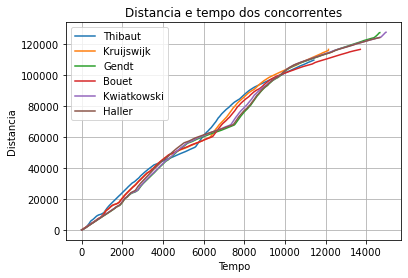

In [42]:
plt.title("Distancia e tempo dos concorrentes")

plt.plot(thibaut['distance'])
plt.plot(kruijswijk['distance'])
plt.plot(gendt['distance'])
plt.plot(bouet['distance'])
plt.plot(kwiatkowski['distance'])
plt.plot(haller['distance'])
plt.ylabel("Distancia")
plt.xlabel("Tempo")

plt.legend(["Thibaut","Kruijswijk","Gendt","Bouet","Kwiatkowski","Haller"])
plt.grid()

# Comparação de Thibaut Pinot e Marco Haller

NameError: name 'thibaut' is not defined

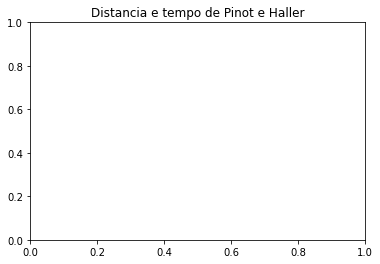

In [102]:
plt.title("Distancia e tempo de Pinot e Haller")

plt.plot(thibaut['distance'])
plt.plot(haller['distance'])
plt.ylabel("Distancia")
plt.xlabel("Tempo")

plt.legend(["Thibaut","Haller"])
plt.grid()